In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from enum import Enum
from math import atan, sqrt, tanh, erf, e, pi
from copy import copy

# Transfer Function

In [2]:
# 转移函数 V-Shape 和 S-Shape
class TransferFuncion(Enum):
    """转移函数的枚举值
    """
    V1 = 1
    V2 = 2
    V3 = 3
    V4 = 4
    S1 = 5
    S2 = 6
    S3 = 7
    S4 = 8
    
    
def transfer_function(transfer_function_type: TransferFuncion, a: float) -> float:
    """将值映射到 [0, 1] 区间的 8 种转移函数（4 种 V-Shape 和 4 种 S-Shape）

    Args:
        transfer_function_type (TransferFuncion): 转移函数类型
        a (float): 任意实数值

    Returns:
        float: 经过转移函数映射到 [0, 1] 区间的值
    """
    if transfer_function_type == TransferFuncion.V1:
        return abs((2/pi)*atan((pi/2)*a))
    
    elif transfer_function_type == TransferFuncion.V2:
        return abs(tanh(a))
        
    elif transfer_function_type == TransferFuncion.V3:
        return abs(a/(sqrt(1+a**2)))
    
    elif transfer_function_type == TransferFuncion.V4:
        return abs(erf((sqrt(pi)/2)*a))
    
    elif transfer_function_type == TransferFuncion.S1:
        return 1/(1+e**(-a))
    
    elif transfer_function_type == TransferFuncion.S2:
        return 1/(1+e**(-2*a))
    
    elif transfer_function_type == TransferFuncion.S3:
        return 1/(1+(e**(-a/2)))
    
    elif transfer_function_type == TransferFuncion.S4:
        return 1/(1+(e**(-a/3)))
    
    else:
        print('[ERROR] Unknow transfer function type, Please use V1~V4 or S1~S4')
        exit
    

## V-Shape

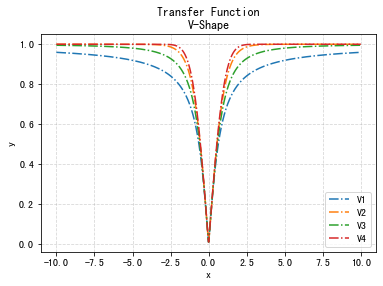

In [3]:
x = np.linspace(start=-10.0, stop=10.0, num=1000)

plt.figure()

for tf in [TransferFuncion.V1, TransferFuncion.V2, TransferFuncion.V3, TransferFuncion.V4]:
    y = [transfer_function(tf, a) for a in x]
    plt.plot(x, y, linestyle='-.')
    
plt.title('Transfer Function\nV-Shape')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['V1', 'V2', 'V3', 'V4'], loc='lower right')
plt.show()

## S-Shape

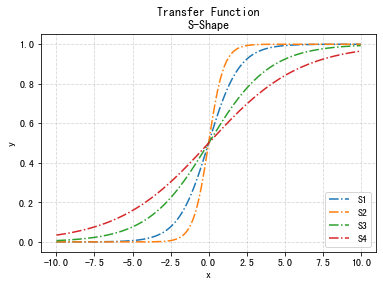

In [4]:
plt.figure()

for tf in [TransferFuncion.S1, TransferFuncion.S2, TransferFuncion.S3, TransferFuncion.S4]:
    y = [transfer_function(tf, a) for a in x]
    plt.plot(x, y, linestyle='-.')
    
plt.title('Transfer Function\nS-Shape')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['S1', 'S2', 'S3', 'S4'], loc='lower right')
plt.show()

## 将物品列表中的随机数转换为二元的 0 或 1

In [5]:
def to_binary(tf: TransferFuncion, arr2binary: np.ndarray) -> np.ndarray:
    """将连续值转化为二进制值

    Args:
        tf (TransferFuncion): 随机所使用的转移函数
        arr2binary (np.ndarray): 待二元化数组

    Returns:
        np.ndarray: 经过转移函数映射过后生成的二元数组
    """
    return np.array([1 if transfer_function(tf, a) >= 0.5 else 0 for a in arr2binary])  #TODO 替换成 rand()
    

# 初始化函数


## 是否放入物品表

In [6]:
def initialization(Particles_no: int, dim: int) -> np.ndarray:
    """生成一个 Particles_no 行，dim 列的数组 C

    Args:
        Particles_no (int): _description_
        dim (int): _description_

    Returns:
        np.ndarray: _description_
    """
    C = np.zeros(shape=(Particles_no, dim))
    
    for i in range(Particles_no):
        for j in range(dim):
            if np.random.rand() > 0.5:
                C[i, j] = 0
            else:
                C[i, j] = 1
                
    return C

In [7]:
def arr2bin(arr: np.ndarray, tf: TransferFuncion) -> np.ndarray:
    for i in range(arr.shape[0]):
        if transfer_function(tf, arr[i]) >= np.random.rand():
            arr[i] = 0
        else:
            arr[i] = 1
    return arr

## 生成随机物品价值表

In [8]:
def get_price_table(n: int, min_price: int, max_price: int) -> np.ndarray:
    """生成物品价值表（n行，1列），也就是对应 n 个物品。价值的范围为：[min_price, max_price]

    Args:
        n (int): 物品数量
        min_price (int): 最小价值（大于 0）
        max_price (int): 最大价值（大于最小价值）

    Returns:
        np.ndarray: 一维数组
    """
    if n < 0:
        print('[ERROR] n CAN NOT small than 1')
        exit
    
    if (min_price < 1) or (max_price <= min_price):
        print('[ERROR] min_price CAN NOT small than 1 and max_price CAN NOT small than min_price')
        exit
    
    return np.random.randint(low=min_price + 1, high=max_price + 1, size=n)

## 生成随机物品重量表

In [9]:
def get_weight_table(n: int, min_weight: int, max_weight: int) -> np.ndarray:
    """生成物品重量表（n行，1列），也就是对应 n 个物品。重量的范围为：[min_weight, max_weight]

    Args:
        n (int): 物品熟练
        min_weight (int): 最小重量（大于 0）
        max_weight (int): 最大重量（大于最小重量）

    Returns:
        np.ndarray: 一维数组
    """
    if n < 0:
        print('[ERROR] n CAN NOT small than 1')
        exit
    
    if (min_weight < 1) or (max_weight <= min_weight):
        print('[ERROR] min_weight CAN NOT small than 1 and max_weight CAN NOT small than min_weight')
        exit
    
    return np.random.randint(low=min_weight + 1, high=max_weight + 1, size=n)

## 适应度函数（RF - 惩罚函数）

In [10]:
def get_fitness(arr_binary: np.ndarray, arr_price: np.ndarray, arr_weight: np.ndarray, knapsack_capacity: int) -> np.int32:
    """【Fitness function】获取适应度，也就是放入背包的物品。如果不能放入背包则适应度为负数（惩罚函数）

    Args:
        arr_binary (np.ndarray): 二元化后的数组
        arr_price (np.ndarray): 价值数组
        arr_weight (np.ndarray): 重量数组
        knapsack_capacity (int): 背包容量

    Returns:
        np.int32: 适应度
    """
    if arr_binary.shape != arr_price.shape or arr_price.shape != arr_weight.shape:
        print('[ERROR] arr_binary, arr_price, arr_weight should have same shape')
        exit
    
    sum_price = 0
    sum_weight = 0
    for i in range(arr_binary.shape[0]):
        if 0 == arr_binary[i]:
            continue
        sum_price += arr_price[i]
        sum_weight += arr_weight[i]
        
    if sum_weight > knapsack_capacity:
        sum_weight = -sum_weight
        
    return sum_weight

## 最大值物品的下标

In [11]:
def get_index_max_price(arr_price: np.ndarray) -> int:
    """获取最大价值物品的下标

    Args:
        arr_price (np.ndarray): 存储物品价值的数组

    Returns:
        int: 最大价值物品的下标
    """
    return arr_price.tolist().index(arr_price.max())

## 最小值物品的下标

In [12]:
def get_index_min_price(arr_price: np.ndarray) -> int:
    """获取最小价值物品的下标

    Args:
        arr_price (np.ndarray): 存储物品价值的数组

    Returns:
        int: 最小价值物品的下标
    """
    return arr_price.tolist().index(arr_price.mix())

## 获取「不在」背包中性价比最大物品的下标

In [13]:
def get_index_max_cost_performance(arr_binary: np.ndarray, arr_price: np.ndarray, arr_weight: np.ndarray) -> int:
    """返回不在背包中性价比最大物品的下标
    性价比：p_i/w_i

    Args:
        arr_binary (np.ndarray): 二元化后的数组（一维）
        arr_price (np.ndarray): 价值数组
        arr_weight (np.ndarray): 重量数组

    Returns:
        int: 不在背包中性价比最大物品的下标
    """
    if arr_binary.shape != arr_price.shape or arr_price.shape != arr_weight.shape:
        print('[ERROR] arr_binary, arr_price, arr_weight should have same shape')
        exit
        
    index_max_cp = None
    max_cp = None
    for i in range(arr_binary.shape[0]): #TODO
        if 1 == arr_binary[i]:
            continue
        
        current_cp = arr_price[i] / arr_weight[i]
        if max_cp is None or current_cp > max_cp:
            max_cp = current_cp
            index_max_cp = i
            
    return index_max_cp

## 获取「背包中」性价比最小物品的下标

In [14]:
def get_index_min_cost_performance(arr_binary: np.ndarray, arr_price: np.ndarray, arr_weight: np.ndarray) -> int:
    """返回背包中性价比最小物品的下标
    性价比：p_i/w_i

    Args:
        arr_binary (np.ndarray): 二元化后的数组（一维）
        arr_price (np.ndarray): 价值数组
        arr_weight (np.ndarray): 重量数组

    Returns:
        int: 背包中性价比最小物品的下标
    """
    if arr_binary.shape != arr_price.shape or arr_price.shape != arr_weight.shape:
        print('[ERROR] arr_binary, arr_price, arr_weight should have same shape')
        exit
        
    index_min_cp = None
    min_cp = None
    for i in range(arr_binary.shape[0]):
        if 0 == arr_binary[i]:
            continue
        
        current_cp = arr_price[i] / arr_weight[i]
        if min_cp is None or current_cp < min_cp:
            min_cp = current_cp
            index_min_cp = i
            
    return index_min_cp

# 修复不可行解

## RA - 修复算法

Repari Algorithm, 其作用是修正PF算法返回的不可行解

**在修复算法中:** 

1. $\frac{\mathrm{p}_{i}}{\mathrm{w}_{i}}$ 值最低的物品是从背包中取出的。 

2. 对新解决方案进行评估

3. 检查新解决方案的可行性，如果不可行，则重复步骤1和2，直到找到可行的解决方案(参见算法3)。

In [15]:
def repari_alg(arr_binary: np.ndarray, arr_price: np.ndarray, arr_weight: np.ndarray, knapsack_capacity: int) -> np.ndarray:
    """RA - 修复算法，其作用是修正PF算法（惩罚函数）返回的不可行解。并「返回」修复后的新组

    Args:
        arr_binary (np.ndarray): 二元化后的数组（一维）
        arr_price (np.ndarray): 价值数组
        arr_weight (np.ndarray): 重量数组
        knapsack_capacity (int): 背包容量

    Returns:
        np.ndarray: RA 算法修复后的新行（一维数组）
    """
    arr_binary = copy(arr_binary)
    while get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity) < 0:
        index_min_cp = get_index_min_cost_performance(arr_binary, arr_price, arr_weight)
        arr_binary[index_min_cp] = 0
        
    return arr_binary

## IM - 改进算法

Improvement Algorithm, 其作用是改进RA返回的可行解

**在改进算法中：**

1. $\frac{\mathrm{p}_{i}}{\mathrm{w}_{i}}$ 比值最高的物品被选择在背包中

2. 对新解决方案进行评估

3. 检查新解决方案的可行性，如果不可行，则删除背包中最后选择的项目，并终止改进过程(如算法4所示)。

In [16]:
def improvement_alg(arr_binary: np.ndarray, arr_price: np.ndarray, arr_weight: np.ndarray, knapsack_capacity: int) -> np.ndarray:
    """IM - 改进算法，其作用是改进RA（修复算法）返回的可行解。并「返回」改进后的新组
    Args:
        arr_binary (np.ndarray): 二元化后的数组（一维）
        arr_price (np.ndarray): 价值数组
        arr_weight (np.ndarray): 重量数组
        knapsack_capacity (int): 背包容量
    Returns:
        np.ndarray: IM 算法改进后的新行（一维数组）
    """
    arr_binary = copy(arr_binary)
    last_array = copy(arr_binary) # 暂存改进前的数组
    while get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity) > 0:
        last_array = copy(arr_binary)
        index_max_cp = get_index_max_cost_performance(arr_binary, arr_price, arr_weight)
        arr_binary[index_max_cp] = 1
     
    return last_array

# 说明性的例子

In [17]:
arr_binary = np.array([0, 1, 1])
arr_price = np.array([5, 10, 15])
arr_weight = np.array([2, 30, 10])
knapsack_capacity = 15

print('\n', '>' * 20, '根据原本数据：')
print('背包内容：', arr_binary)
print('适应度（惩罚函数）：', get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity))
print('背包「中」性价比最低的物品的下标：', get_index_min_cost_performance(arr_binary, arr_price, arr_weight))

# 调用修复算法
print('\n', '>' * 20, '\n调用修复算法:')
arr_binary = repari_alg(arr_binary, arr_price, arr_weight, knapsack_capacity)
print('调用修复算法后的适应度（惩罚函数）：', get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity))
print('背包内容：', arr_binary)

# 调用改进算法
print('\n', '>' * 20, '\n调用改进算法:')
print('「不在背包」性价比最高的物品的下标：', get_index_max_cost_performance(arr_binary, arr_price, arr_weight))
print('调用改进算法后的适应度（惩罚函数）：', get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity))
arr_binary = improvement_alg(arr_binary, arr_price, arr_weight, knapsack_capacity)
print('调用改进算法后的适应度（惩罚函数）：', get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity))
print('背包内容：', arr_binary)


 >>>>>>>>>>>>>>>>>>>> 根据原本数据：
背包内容： [0 1 1]
适应度（惩罚函数）： -40
背包「中」性价比最低的物品的下标： 1

 >>>>>>>>>>>>>>>>>>>> 
调用修复算法:
调用修复算法后的适应度（惩罚函数）： 10
背包内容： [0 0 1]

 >>>>>>>>>>>>>>>>>>>> 
调用改进算法:
「不在背包」性价比最高的物品的下标： 0
调用改进算法后的适应度（惩罚函数）： 10
调用改进算法后的适应度（惩罚函数）： 12
背包内容： [1 0 1]


In [18]:
def BiEO(tf: TransferFuncion, arr_price: np.ndarray, arr_weight: np.ndarray, knapsack_capacity: int,
         num_groups_particle: int, num_runs: int, max_iters: int, a_1: int, a_2: int, GP: float) -> np.ndarray:
    """
    二元优化算法
    :param tf: 转移函数
    :param arr_price:  价值表
    :param arr_weight: 重量表
    :param knapsack_capacity: 背包容量
    :param num_groups_particle: 粒子群数量
    :param num_runs: 运行次数
    :param max_iters: 最大迭代次数
    :param a_1: 探索能力
    :param a_2: 开发能力
    :param GP: 生成率
    :return: 最终取得的候选池 (Ceq, pool)
    """

    print('\n[INFO] -------------- 初始化变量 --------------')
    num_particles_every_group = arr_weight.shape[0]
    print(f'初始化背包：\n'
          f'\t背包体积: {knapsack_capacity}\n'
          f'\t粒子组数量: {num_groups_particle}\n'
          f'\t每组中物品个数(dim维度): {num_particles_every_group}\n')

    print('\n[INFO] -------------- 价值表 --------------')
    print(f'{arr_price}')

    print('\n[INFO] -------------- 重量表 --------------')
    print(f'{arr_weight}')

    print(f'初始化 BiEO 参数：\n'
          f'\t运行次数: {num_runs}\n'
          f'\t每次运行中迭代次数: {max_iters}\n'
          f'\ta_1: {a_1}\n'
          f'\ta_2: {a_2}\n'
          f'\t转移函数: {tf}\n'
          f'\tGP: {GP}')

    print('\n[INFO] -------------- 初始化粒子群C --------------')
    C = initialization(num_groups_particle, num_particles_every_group)  # 0-1 值，物品是否放入背包
    print(f'C: {C}')

    print('\n[INFO] -------------- 初始化均衡池粒子群 Ceq_1 ~ Ceq_4 --------------')
    Ceq_1 = np.zeros(num_particles_every_group)
    Ceq_1_fit = float('-inf')
    Ceq_2 = np.zeros(num_particles_every_group)
    Ceq_2_fit = float('-inf')
    Ceq_3 = np.zeros(num_particles_every_group)
    Ceq_3_fit = float('-inf')
    Ceq_4 = np.zeros(num_particles_every_group)
    Ceq_4_fit = float('-inf')

    print(f'\tCeq_1_fit: {Ceq_1_fit}\n'
          f'\tCeq_1: {Ceq_1}\n'
          f'\tCeq_1_fit: {Ceq_2_fit}\n'
          f'\tCeq_1: {Ceq_2}\n'
          f'\tCeq_1_fit: {Ceq_3_fit}\n'
          f'\tCeq_1: {Ceq_3}\n'
          f'\tCeq_1_fit: {Ceq_4_fit}\n'
          f'\tCeq_1: {Ceq_4}\n'
          )

    print('=============================== BiEO 开始迭代 ===============================')
    it = 1
    C_pool = None
    while it <= max_iters:
        print(f'\n[INFO] -------------------- 当前迭代 {it}/{max_iters} --------------------')

        for i in range(C.shape[0]):
            C[i] = arr2bin(arr=C[i], tf=tf)
            fitness = get_fitness(arr_binary=C[i], arr_price=arr_price, arr_weight=arr_weight,
                                  knapsack_capacity=knapsack_capacity)
            print(f'\n[INFO] 当前粒子群适应度：{fitness}')

            if fitness < 0:
                C[i] = repari_alg(arr_binary=C[i], arr_price=arr_price, arr_weight=arr_weight,
                                  knapsack_capacity=knapsack_capacity)
                C[i] = improvement_alg(arr_binary=C[i], arr_price=arr_price, arr_weight=arr_weight,
                                       knapsack_capacity=knapsack_capacity)
                fitness = get_fitness(arr_binary=C[i], arr_price=arr_price, arr_weight=arr_weight,
                                      knapsack_capacity=knapsack_capacity)
                print(f'[INFO] 调用 RA & IA 且更新后适应度：{fitness}')

            if fitness > Ceq_1_fit:
                # print('[INFO] Update Ceq_1')
                Ceq_1_fit = fitness
                Ceq_1 = copy(C[i])
            elif (fitness < Ceq_1_fit) and (fitness > Ceq_2_fit):
                # print('[INFO] Update Ceq_2')
                Ceq_2_fit = fitness
                Ceq_2 = copy(C[i])
            elif (fitness < Ceq_1_fit) and (fitness < Ceq_2_fit) and (fitness > Ceq_3_fit):
                # print('[INFO] Update Ceq_3')
                Ceq_3_fit = fitness
                Ceq_3 = copy(C[i])
            elif (fitness < Ceq_1_fit) and (fitness < Ceq_2_fit) and (fitness < Ceq_3_fit) and (fitness > Ceq_4_fit):
                # print('[INFO] Update Ceq_4')
                Ceq_4_fit = fitness
                Ceq_4 = copy(C[i])
            else:
                # print('[INFO] 未更新 Ceq')
                pass
            # print(f'[INFO] 当前Ceq1 ~ Ceq_4 候选者适应度: \n'
            #       f'\tCeq_1_fit: {Ceq_1_fit}\n'
            #       f'\tCeq_2_fit: {Ceq_2_fit}\n'
            #       f'\tCeq_3_fit: {Ceq_3_fit}\n'
            #       f'\tCeq_4_fit: {Ceq_4_fit}\n')

        Ceq_ave = np.round((Ceq_1 + Ceq_2 + Ceq_3 + Ceq_4) / 4)  # 均衡池候选者的平均值
        C_pool = np.array([Ceq_1, Ceq_2, Ceq_3, Ceq_4, Ceq_ave])  # 均衡池
        print(f'[INFO] 当前均衡池: \n'
              f'\tCeq_1: {C_pool[0]}\t|\tCeq_1_fit: {Ceq_1_fit}\n'
              f'\tCeq_2: {C_pool[1]}\t|\tCeq_2_fit: {Ceq_2_fit}\n'
              f'\tCeq_3: {C_pool[2]}\t|\tCeq_3_fit: {Ceq_3_fit}\n'
              f'\tCeq_4: {C_pool[3]}\t|\tCeq_4_fit: {Ceq_4_fit}\n'
              f'\tCeq_ave: {C_pool[4]}\n')

        t = (1 - it / max_iters) ** (a_2 * it / max_iters)  # Eq(4)
        for i in range(C.shape[0]):
            Ceq = C_pool[np.random.randint(C_pool.shape[0])]  # 从均衡池中随机抽取一个
            lambda_F = np.random.random(num_particles_every_group)
            r = np.random.random(num_particles_every_group)
            F = a_1 * np.sign(r - 0.5) * (np.exp(-lambda_F * t) - 1)  # Eq(6)
            GCP = 0.5 * np.random.random() * np.ones(num_particles_every_group) * (np.random.random() > GP)  # Eq(9)
            G_0 = GCP * (Ceq - lambda_F * C[i])  # Eq(8)
            G = G_0 * F  # Eq(7)
            C[i] = (C[i] - Ceq) * F + (G / lambda_F) * (1 - F)  # Eq(10)

        it += 1

    print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 迭代结束 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
    print(f'4个最优解：\n'
          f'\tCeq_1: {C_pool[0]}\t|\tCeq_1_fit: {Ceq_1_fit}\n'
          f'\tCeq_2: {C_pool[1]}\t|\tCeq_2_fit: {Ceq_2_fit}\n'
          f'\tCeq_3: {C_pool[2]}\t|\tCeq_3_fit: {Ceq_3_fit}\n'
          f'\tCeq_4: {C_pool[3]}\t|\tCeq_4_fit: {Ceq_4_fit}\n'
          f'\tCeq_avg_fit: {(Ceq_1_fit + Ceq_2_fit + Ceq_3_fit + Ceq_4_fit) / 4}\n')

    return C_pool

---

# 程序入口

In [19]:
KP_1_c = 269
KP_1_w = np.array([95,4,60,32,23,72,80,62,65,46])
KP_1_v = np.array([55,10,47,5,4,50,8,61,85,87])

KP_2_c = 878
KP_2_w = np.array([92,4,43,83,84,68,92,82,6,44,32,18,56,83,25,96,70,48,14,58])
KP_2_v = np.array([44,46,90,72,91,40,75,35,8,54,78,40,7,15,61,17,75,29,75,63])

KP_3_c = 20
KP_3_w = np.array([6,5,9,7])
KP_3_v = np.array([9, 11, 13, 15])

KP_4_c = 11
KP_4_w = np.array([2,4,6,7])
KP_4_v = np.array([6, 10, 12, 13])

KP_5_c = 375
KP_5_w = np.array([56.358531, 80.874050, 47.987304, 89.596240, 74.660482, 85.894345, 51.353496, 1.498459, 36.445204, 16.589862, 44.569231, 0.466933, 37.788018, 57.118442, 60.716575])
KP_5_v = np.array([0.125126, 19.330424, 58.500931, 35.029145, 82.284005, 17.410810, 71.050142, 30.399487, 9.140294, 14.731285, 98.852504, 11.908322, 0.891140, 53.166295, 60.176397])

KP_6_c = 60
KP_6_w = np.array([30,25,20,18,17,11,5,2,1,1])
KP_6_v = np.array([20,18,17,15,15,10,5,3,1,1])

KP_7_c = 50
KP_7_w = np.array([31,10,20,19,4,3,6])
KP_7_v = np.array([70,20,39,37,7,5,10])

KP_8_c = 10000
KP_8_w = np.array([983, 982, 981, 980, 979, 978, 488, 976, 972, 486, 486, 972, 972, 485, 485, 969, 966, 483, 964, 963, 961, 958, 959])
KP_8_v = np.array([981, 980, 979, 978, 977, 976, 487, 974, 970, 485, 485, 970, 970, 484, 484, 976, 974, 482, 962, 961, 959, 958, 857])

KP_9_c = 80
KP_9_w = np.array([15,20,17,8,31])
KP_9_v = np.array([33, 24, 36, 37, 12])

KP_10_c = 879
KP_10_w = np.array([84,83,43,4,44,6,82,92,25,83,56,18,58,14,48,70,96,32,68,92])
KP_10_v = np.array([91,72,90,46,55,8,35,75,61,15,77,40,63,75,29,75,17,78,40,44])

KP_11_c = 577
KP_11_w = np.array([46,17,35,1,26,17,17,48,38,17,32,21,29,48,31, 8,42,37,6,9,15,22,27,14,42,40,14,31,6,34])
KP_11_v = np.array([57,64,50,6,52,6,85,60,70,65,63,96,18,48,85, 50, 77, 18, 70, 92, 17, 43, 5, 23, 67, 88, 35, 3, 91, 48])

KP_12_c = 655
KP_12_w = np.array([7,4,36,47,6,33,8,35,32,3,40,50,22,18,3,12,30,31, 13, 33, 4, 48, 5, 17, 33, 26, 27, 19, 39, 15, 33, 47, 17, 41, 40])
KP_12_v = np.array([35,67,30,69,40,40,21,73,82,93,52,20,61,20,42,86,43, 93, 38, 70, 59, 11, 42, 93, 6, 39, 25, 23, 36, 93, 51, 81, 36, 46, 96])

KP_13_c = 819
KP_13_w = np.array([28,23,35,38,20,29,11,48,26,14,12,48,35,36,33,39,30,26, 44,20,13,15,46,36,43,19,32,2,47,24,26,39,17,32,17,16,33,22,6,12])
KP_13_v = np.array([13,16,42,69,66,68,1,13,77,85,75,95,92,23,51,79,53,62,56,74, 7, 50, 23, 34, 56, 75, 42, 51, 13, 22, 30, 45, 25, 27, 90, 59, 94, 62, 26, 11])

KP_14_c = 907
KP_14_w = np.array([18,12,38,12,23,13,18,46,1,7,20,43,11,47,49,19,50,7,39,29,32,25,12, 8,32,41,34,24,48,30,12,35,17,38,50,14,47,35,5,13,47,24,45,39,1])
KP_14_v = np.array([98,70,66,33,2,58,4,27,20,45,77,63,32,30,8,18,73,9,92,43,8,58,84, 35,78,71,60,38,40,43,43,22,50,4,57,5,88,87,34,98,96,99,16,1,25])

KP_15_c = 882
KP_15_w = np.array([15,40,22,28,50,35,49,5,45,3,7,32,19,16,40,16,31,24,15,42, 29,4,14,9,29,11,25,37,48,39,5,47,49,31,48,17, 46,1,25,8,16,9,30,33,18,3,3,3,4,1])
KP_15_v = np.array([78,69,87,59,63,12,22,4,45,33,29,50,19,94,95,60,1,91,69,8, 100, 84, 100, 32, 81, 47, 59, 48, 56, 18, 59, 16, 45, 54, 4798, 75, 20, 4, 19, 58, 63, 37, 64, 90, 26, 29, 13, 53, 83])

KP_16_c = 1050
KP_16_w = np.array([27,15,46,5,40,9,36,12,11,11,49,20,32,3,12,44,24,1,24,42, 44, 16, 12, 42, 22, 26, 10, 8, 46, 50, 20, 42, 48, 45, 43, 35, 9, 12,22, 2, 14, 50, 16, 29, 31, 46, 20, 35, 11, 4, 32, 35, 15, 29, 16])
KP_16_v = np.array([98,74,76,4,12,27,90,98,100,35,30,19,75,72,19,44,5,66, 79,87,79,44,35,6,82,11,1,28,95,68,39,86,68,61,44,97,83,2,15, 49, 59, 30, 44, 40, 14, 96, 37, 84, 5, 43, 8, 32, 95, 86, 18])

KP_17_c = 1006
KP_17_w = np.array([7,13,47,33,38,41,3,21,37,7,32,13,42,42,23,20,49,1,20,25,31,4,8, 33,11,6,3,9,26,44,39,7,4,34,25,25,16,17,46,23,38,10,5,11, 28,34,47,3,9,22,17,5,41,20,33,29,1,33,16,14])
KP_17_v = np.array([81,37,70,64,97,21,60,9,55,85,5,33,71,87,51,100,43,27,48,17,16, 27, 76, 61, 97, 78, 58, 46, 29, 76, 10, 11, 74, 36, 59, 30, 72, 37, 72, 100, 9, 47, 10, 73, 92, 9, 52, 56, 69, 30, 61, 20, 66, 70, 46, 16, 43, 60, 33, 84])

KP_18_c = 1319
KP_18_w = np.array([47,27,24,27,17,17,50,24,38,34,40,14,15,36,10,42,9,48,37,7,43,47,29, 20,23,36,14,2,48,50,39,50,25,7,24,38,34,44,38,31,14,17,42,20, 5,44,22,9,1,33,19,19,23,26,16,24,1,9,16,38,30,36,41,43,6])
KP_18_v = np.array([47,63,81,57,3,80,28,83,69,61,39,7,100,67,23,10,25,91,22,48,91,20, 45, 62, 60, 67, 27, 43, 80, 94, 47, 31, 44, 31, 28, 14, 17, 50, 9, 93, 15, 17, 72, 68, 36, 10, 1, 38, 79, 45, 10, 81, 66, 46, 54, 53, 63, 65, 20, 81, 20, 42, 24, 28, 1])

KP_19_c = 1426
KP_19_w = np.array([4,16,16,2,9,44,33,43,14,45,11,49,21,12,41,19,26,38,42,20, 5,14,40,47,29,47,30,50,39,10,26,33,44,31,50,7,15,24,7,12, 10, 34, 17, 40, 28, 12, 35, 3, 29, 50, 19, 28, 47, 13, 42, 9, 44, 14, 43, 41, 10, 49, 13, 39, 41, 25, 46, 6, 7, 43])
KP_19_v = np.array([66,76,71,61,4,20,34,65,22,8,99,21,99,62,25,52,72,26,12,55, 22,32,98,31,95,42,2,32,16,100,46,55,27,89,11,8,3,43,93,53,88, 36,41,60,92,14,5,41,60,92,30,55,79,33,10,45,3,68,12,20,54,63, 38, 61, 85, 71, 40, 58, 25, 73, 35])

KP_20_c = 1433
KP_20_w = np.array([24,45,15,40,9,37,13,5,43,35,48,50,27,46,24,45,2,7,38,20, 20,31,2,20,3,35,27,4,21,22,33,11,5,24,37,31,46,13,12,12, 41, 36, 44, 36, 34, 22, 29, 50, 48, 17, 8, 21, 28, 2, 44, 45, 25, 11, 37, 35, 24,9,40,45,8,47,1,22,1,12,36,35,14,17,5])
KP_20_v = np.array([2,73,82,12,49,35,78,29,83,18,87,93,20,6,55,1,83,91,71,25,59, 94,90,61,80,84,57,1,26,44,44,88,7,34,18,25,73,29,24,14,23,82, 38, 67, 94, 43, 61, 97, 37, 67, 32, 89, 30, 30, 91, 50, 21, 3, 18, 31, 97, 79, 68, 85, 43, 71, 49, 83, 44, 86, 1, 100, 28, 4, 16])

In [20]:
for i in range(1, 21):
    print(f'KP_{i}_v, ', end = "")

KP_1_v, KP_2_v, KP_3_v, KP_4_v, KP_5_v, KP_6_v, KP_7_v, KP_8_v, KP_9_v, KP_10_v, KP_11_v, KP_12_v, KP_13_v, KP_14_v, KP_15_v, KP_16_v, KP_17_v, KP_18_v, KP_19_v, KP_20_v, 

In [ ]:
print('==================== main start ====================')

"""调用 BiEO 算法"""
C_pool = BiEO(tf=TransferFuncion.V2,
                arr_price=KP_1_v,
                arr_weight=KP_1_w,
                knapsack_capacity=KP_1_c,
                num_groups_particle=20,  # [20]
                num_runs=20,  # [20]
                max_iters=5000,  # [5000]
                a_1=3,  # [3]
                a_2=1,  # [1]
                GP=0.5)

print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 迭代结束 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
Ceq_1_fit = get_fitness(arr_binary=C_pool[0], arr_price=arr_price, arr_weight=arr_weight, knapsack_capacity=knapsack_capacity)
Ceq_2_fit = get_fitness(arr_binary=C_pool[1], arr_price=arr_price, arr_weight=arr_weight, knapsack_capacity=knapsack_capacity)
Ceq_3_fit = get_fitness(arr_binary=C_pool[2], arr_price=arr_price, arr_weight=arr_weight, knapsack_capacity=knapsack_capacity)
Ceq_4_fit = get_fitness(arr_binary=C_pool[3], arr_price=arr_price, arr_weight=arr_weight, knapsack_capacity=knapsack_capacity)
print(f'4个最优解：\n'
        f'\tCeq_1: {C_pool[0]}\t|\tCeq_1_fit: {Ceq_1_fit}\n'
        f'\tCeq_2: {C_pool[1]}\t|\tCeq_2_fit: {Ceq_2_fit}\n'
        f'\tCeq_3: {C_pool[2]}\t|\tCeq_3_fit: {Ceq_3_fit}\n'
        f'\tCeq_4: {C_pool[3]}\t|\tCeq_4_fit: {Ceq_4_fit}\n'
        f'\tCeq_avg_fit: {(Ceq_1_fit + Ceq_2_fit + Ceq_3_fit + Ceq_4_fit) / 4}\n')


In [22]:
print(KP_19_v.shape[0])
print(KP_19_w.shape[0])
print(123)

71
70
123
